In [1]:
import matplotlib
import pandas
import scipy.stats

%matplotlib inline

# Preparation

### Load Data

In [2]:
source_data = pandas.read_csv('unemployment_salary_and_uninsurance.csv')

In [3]:
source_data['unemploymentRateRel'] = source_data['unemploymentRate2020'] - source_data['unemploymentRate2019']

In [4]:
source_data['titleShort'] = source_data['title'].apply(lambda x: x.replace(' occupations', ''))

In [5]:
source_data = source_data.sort_values('unemploymentRateRel')

### Checks

In [6]:
assert source_data[source_data['unemploymentRateRel'] < 0].shape[0] == 0

### Utility Functions

In [7]:
FONT_FAMILY = 'Lato'

In [8]:
def style_graph(ax, title, x_label, y_label, x_range, y_range):
    """Style a matplotlib graph.
    
    Args:
        ax: The matplob axes to manipulate.
        title: The string title to have appear at the top of the graphic.
        x_label: The label for the hoizontal axis.
        y_label: The label for the vertical axis.
        x_range: Two element tuple or list with the minimum and maximum values for the horizontal axis.
        y_range: Two element tuple or list with the minimum and maximum values for the vertical axis.
    """
    ax.spines['top'].set_color('#ffffff')
    ax.spines['right'].set_color('#ffffff')
    ax.spines['bottom'].set_color('#ffffff')
    ax.spines['left'].set_color('#ffffff')

    ax.set_xlabel(x_label, fontname=FONT_FAMILY, fontweight='medium', fontsize=12)
    ax.set_ylabel(y_label, fontname=FONT_FAMILY, fontweight='medium', fontsize=12)

    ax.xaxis.label.set_color('#555555')
    ax.yaxis.label.set_color('#555555')

    ax.tick_params(axis='x', colors='#555555')
    ax.tick_params(axis='y', colors='#555555')

    if x_range:
        ax.set_xlim(x_range)
    
    if y_range:
        ax.set_ylim(y_range)

    if title:
        ax.set_title(title, fontname=FONT_FAMILY, fontweight='medium', fontsize=13, color="#505050")
        ax.title.set_position([.5, 1.05])

    for tick in ax.get_xticklabels():
        tick.set_fontname(FONT_FAMILY)
        tick.set_fontweight('medium')

    for tick in ax.get_yticklabels():
        tick.set_fontweight('medium')

# EDA

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


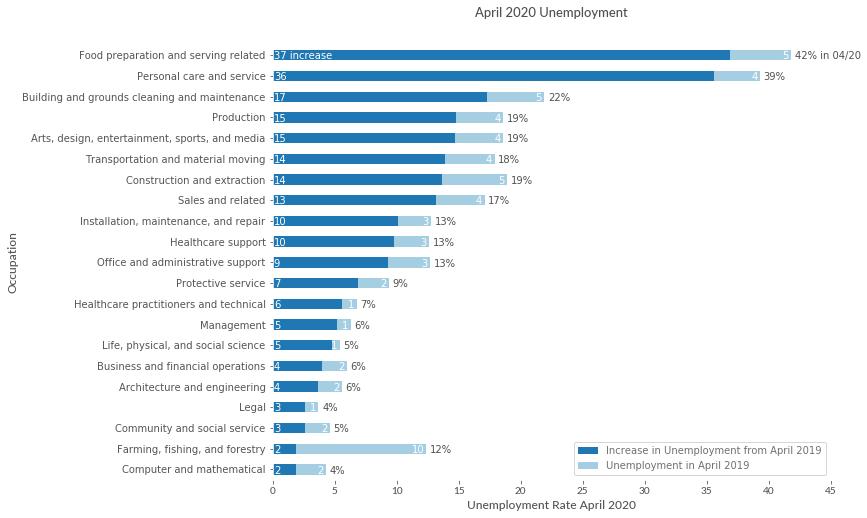

In [9]:
ax = source_data.plot.barh(
    x='titleShort',
    y=[
        'unemploymentRateRel',
        'unemploymentRate2019'
    ],
    figsize=(10, 8),
    stacked=True,
    colors=['#1f78b4', '#a6cee3'] * 21
)

texts = ax.legend().get_texts()
texts[0].set_text('Increase in Unemployment from April 2019')
texts[1].set_text('Unemployment in April 2019')
texts[0].set_color('#707070')
texts[1].set_color('#707070')

for p in ax.patches:
    label_val = str(int(round(p.get_width())))
    if p.get_x() == 0:
        if round(p.get_width()) == 37:
            label_val += ' increase'
        ax.annotate(label_val, (p.get_x() + 0.1, p.get_y() + 0.05), color='#ffffff')
    else:
        end_x = p.get_x() + p.get_width() - 0.7
        if p.get_width() > 10:
            anchor_x = end_x - 0.5
        else:
            anchor_x = end_x
        ax.annotate(label_val, (anchor_x, p.get_y() + 0.05), color='#ffffff')
        
        total_x = round(p.get_x() + p.get_width())
        total_amount_label = str(int(total_x)) + '%'
        if total_x == 42:
            total_amount_label += ' in 04/20'
        ax.annotate(total_amount_label, (end_x + 1, p.get_y() + 0.05), color='#505050')

style_graph(
    ax,
    'April 2020 Unemployment',
    'Unemployment Rate April 2020',
    'Occupation',
    [0, 45],
    None
)

# Tests

## Hypothesis 1: Unemployment and Median Salary are Correlated

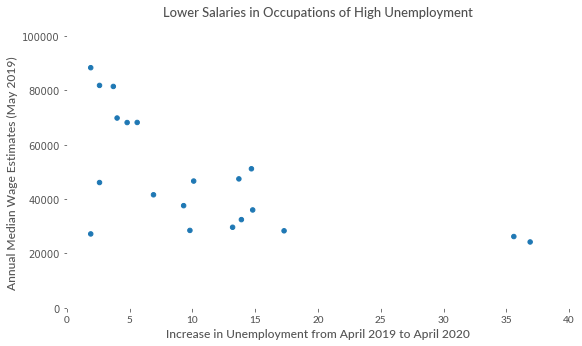

In [10]:
ax = source_data.plot.scatter(
    x='unemploymentRateRel',
    y='annualSalaryMedianUsd',
    colors=['#1f78b4'] * 21,
    figsize=(9,5)
)

style_graph(
    ax,
    'Lower Salaries in Occupations of High Unemployment',
    'Increase in Unemployment from April 2019 to April 2020',
    'Annual Median Wage Estimates (May 2019)',
    [0, 40],
    [0, 100000]
)

In [11]:
p_value = scipy.stats.spearmanr(source_data['unemploymentRate2020'], source_data['annualSalaryMedianUsd']).pvalue
if p_value < 0.05 / 2:
    print('Hypothesis accepted')

Hypothesis accepted


## Hypothesis 2: Unemployment and Uninsured are Correlated

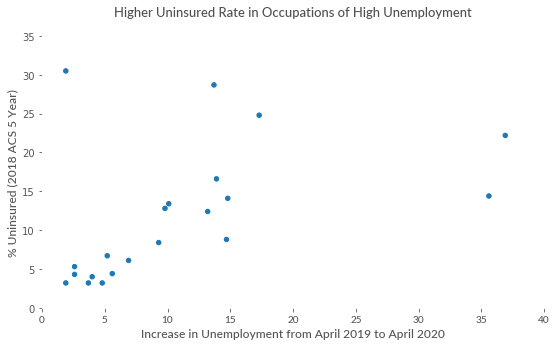

In [12]:
ax = source_data.plot.scatter(x='unemploymentRateRel', y='uninsuranceRate', colors=['#1f78b4'] * 21, figsize=(9,5))

style_graph(
    ax,
    'Higher Uninsured Rate in Occupations of High Unemployment',
    'Increase in Unemployment from April 2019 to April 2020',
    '% Uninsured (2018 ACS 5 Year)',
    [0, 40],
    [0, 35]
)

In [13]:
p_value = scipy.stats.spearmanr(source_data['unemploymentRate2020'], source_data['uninsuranceRate']).pvalue
if p_value < 0.05 / 2:
    print('Hypothesis Accepted')

Hypothesis Accepted
